***Q31***
Part A: Data Cleaning (6 marks)

Load the dataset and identify the count of missing values in each column
Apply appropriate imputation:
For the 'sales' column: Use median imputation with the overall median of the sales column (not per region)
For the 'region' column: Use mode (most frequent value) imputation
Do not drop any rows; only impute the missing values
Print the count of missing values before and after imputation to verify cleaning
Part B: Interactive Visualization (14 marks)

Convert the 'month' column to datetime format and sort the dataset by month in chronological order
Create an interactive line chart using Plotly Express that shows monthly sales trends for each region:
X-axis: month
Y-axis: sales
Use the color parameter to differentiate regions
Add markers to the lines (markers=True)
Calculate and add a 3-month rolling average line for one region of your choice:
Compute the rolling average after imputation on the sorted dataset
Use window=3 for the rolling calculation
Ensure the chart has:
Appropriate title (e.g., "Monthly Sales Trends by Region")
Clear axis labels
Interactive features (hover, zoom work by default in Plotly)
Submission Guidelines:

You may use online compilers (Google Colab, Replit, JupyterLab) without AI autocomplete features
AI tools (ChatGPT, GitHub Copilot, Claude, etc.) are strictly NOT allowed
Submit your complete code in the input box provided below
Follow the code template structure provided

        month region     sales
0  01-01-2023  North   46655.0
1  01-01-2023  South  113085.0
2  01-01-2023   East  149580.0
3  01-02-2023  North  133521.0
4  01-02-2023  South   72775.0
Index(['month', 'region', 'sales'], dtype='object')
Missing values:
 month     0
region    2
sales     5
dtype: int64
Missing values in df[sales] post median imputation 0
mode: 0     East
1    South
Name: region, dtype: object
Missing values in df[region] post mode imputation 0
Missing values before imputation:
month     0
region    2
sales     5
dtype: int64
Missing values after imputation:
month     0
region    0
sales     0
dtype: int64


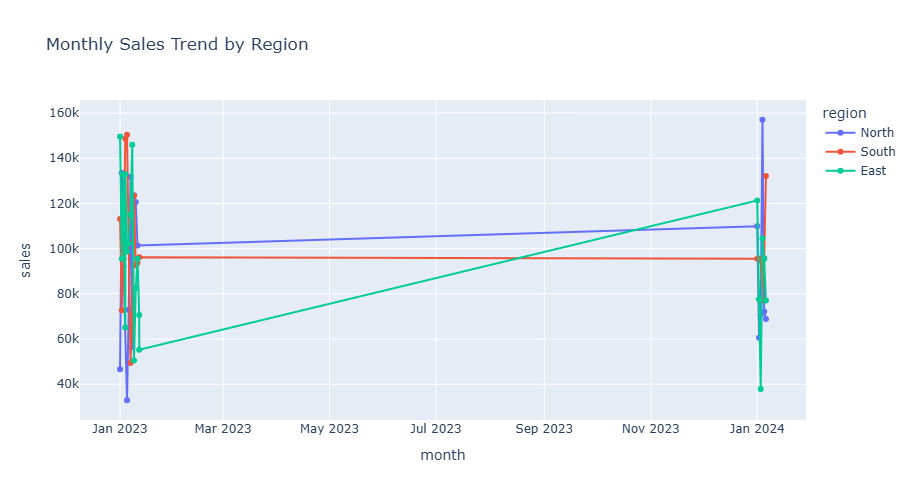

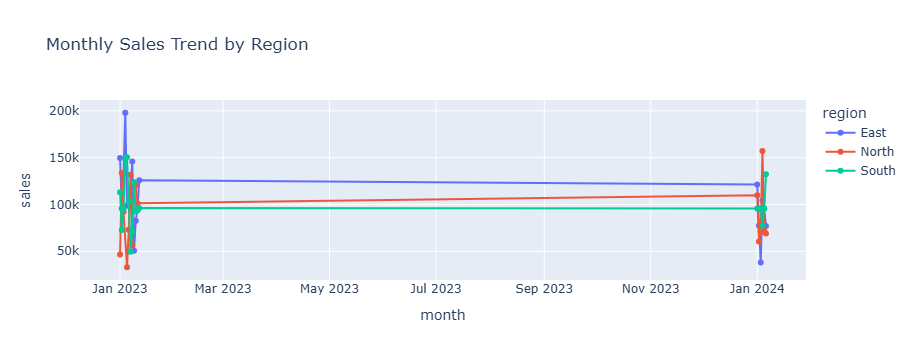

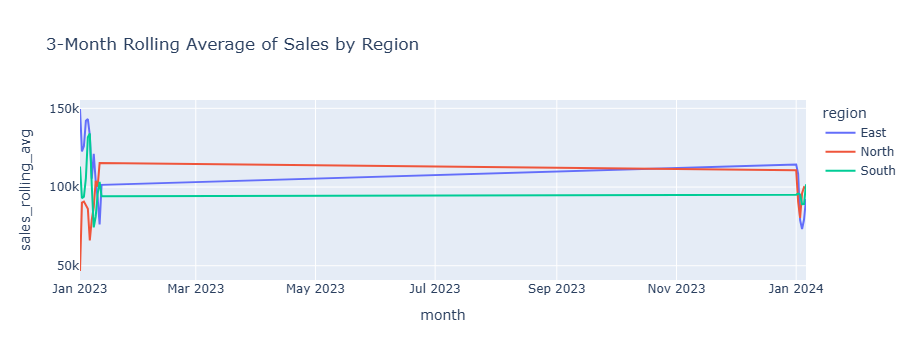

In [50]:
# Question 31: Data Pipeline and Interactive Visualization
# Name: [Girja Shankar]
# Roll Number: [IITP_AIML2510399]

# Import required libraries
import pandas as pd
import numpy as np
import plotly.express as px
# Load data 
# url="https://drive.google.com/drive/folders/1p7WKTk26r3wy92ddd6oIBTqKjCrQHaiG?usp=sharing"
path="sales_data.csv"
df=pd.read_csv(path)
df1=df.copy()
print(df.head())
print(df.columns)
# Part A: Data Cleaning
# Step 1: Load dataset and check missing values
# My code here
print("Missing values:\n", df.isna().sum())

# Step 2: Apply median imputation for sales
# Your code here
df["sales"]= df["sales"].fillna(df["sales"].median())
print("Missing values in df[sales] post median imputation",  df["sales"].isnull().sum())
# Step 3: Apply mode imputation for region
# My code here
print("mode:",df["region"].mode())
df["region"]= df["region"].fillna(df["region"].mode()[0]) # selecting most frequent value from a pandas serires
print("Missing values in df[region] post mode imputation",  df["region"].isnull().sum())
# Step 4: Print missing value counts
print("Missing values before imputation:")
# My print statements here 
print(df1.isnull().sum())

print("Missing values after imputation:")
# Your print statements here
print(df.isnull().sum())
# Part B: Interactive Visualization
# Step 1: Convert month to datetime and sort
# My code here

df["month"] = pd.to_datetime(df["month"])
df = df.sort_values("month")

# Step 2: Create Plotly line chart for all regions
# My code here

fig = px.line(
    df,
    x="month",
    y="sales",
    color="region",
    markers=True,
    title="Monthly Sales Trend by Region",
    width=1000,
    height=500
)


fig.show()

df_agg = (
    df.groupby(["month", "region"])["sales"]
      .sum()
      .reset_index()
)

fig = px.line(
    df_agg,
    x="month",
    y="sales",
    color="region",
    markers=True,
    title="Monthly Sales Trend by Region"
)

fig.show()

# Step 3: Calculate and add rolling average
# Your code here
# Ensure proper sorting
df_agg = df_agg.sort_values(["region", "month"])

# Calculate 3-month rolling average per region
df_agg["sales_rolling_avg"] = (
    df_agg
    .groupby("region")["sales"]
    .rolling(window=3, min_periods=1)
    .mean()
    .reset_index(level=0, drop=True)
)


# Step 4: Display the visualization
# My code here
fig = px.line(
    df_agg,
    x="month",
    y="sales_rolling_avg",
    color="region",
    title="3-Month Rolling Average of Sales by Region"
)

fig.show()

# Q32  ML Model Training and Fairness Evaluation (20 marks)

You are building an income prediction model using a dataset with the following features:
Part A: Preprocessing and Model Training (10 marks)

Split the data into 80% training and 20% testing sets using random_state=42
Feature selection: Use only age, hours_per_week, and occupation as model features. Do not include gender as a model input; gender will be used only for the fairness audit in Part B
For the 'occupation' categorical variable, apply target encoding using the training set:
Calculate the mean of the target variable (income) for each occupation category in the training set
Replace occupation values with these means in both training and test sets
Apply Min-Max scaling to the numerical features (age and hours_per_week) after target encoding
Train a Logistic Regression model using the preprocessed training data and make predictions on the test set

Part B: Evaluation and Fairness Audit (10 marks)

Calculate and print the following standard metrics using the test set (you may use sklearn.metrics functions or compute manually):
Accuracy: (TP + TN) / Total
Precision: TP / (TP + FP)
Recall: TP / (TP + FN)
F1 Score: 2 × (Precision × Recall) / (Precision + Recall)
Calculate Demographic Parity Difference (DPD) between male and female groups using test set predictions (y_pred):
Positive prediction rate for males = (Number of males predicted as 1) / (Total males in test set)
Positive prediction rate for females = (Number of females predicted as 1) / (Total females in test set)
DPD = |Positive prediction rate for males - Positive prediction rate for females|
Interpret the fairness result:
Is DPD ≤ 0.1 (acceptable threshold)?
If DPD > 0.1, state that bias mitigation techniques are needed

Submission Guidelines:

age (numerical)
hours_per_week (numerical)
gender (categorical: Male/Female)
occupation (categorical: Tech/Sales/Healthcare)
income (target: 0 for <=50K, 1 for >50K)
The dataset contains 4000 records. The dataset is balanced such that all three occupation categories appear in both training and test sets after splitting.

In [91]:
# Q32
#Load Data
# url="https://drive.google.com/drive/folders/1p7WKTk26r3wy92ddd6oIBTqKjCrQHaiG?usp=sharing"
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
roc_auc_score, roc_curve, precision_recall_curve, f1_score, precision_score, recall_score)
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier



path="income_data.csv"
df=pd.read_csv(path)
print(df.head())
#Part A Preprocessing and Model Training
# Feature selection: Use only age, hours_per_week, and occupation as model features
# Select target variable

df['occupation'] = df['occupation'].str.strip().str.lower()

X=df[["age", "hours_per_week", "occupation"]]
y = df["income"]

print("Feature data", X, "labeled data", y)
df_train, df_test, y_train, y_test= train_test_split(df, y, test_size=0.2, random_state=42)

# Target encoding only one categorical variable 'occupation' needs to be encoding, apply target encoding using the training set:
#transform("mean") performs mean encoding within the training dataset by replacing each category with its group mean while preserving row count
df_train["occupation"]=df_train.groupby("occupation")["income"].transform("mean")
print("Encoded Train data=:", df_train)


# Test data encoding: map() with fillna() applies category-wise mean encoding learned from training data to test data and 
# safely handles unseen categories using the global mean
make_category_wise_mean=df_train.groupby("occupation")["income"].mean()
global_mean=df_train["income"].mean()
df_test["occupation"]=df_test["occupation"].map(make_category_wise_mean).fillna(global_mean)
print("Encoded Test data=:", df_test)

# Scaling: Apply Min-Max scaling to the numerical features (age and hours_per_week) after target encoding
column_scale = ["age", "hours_per_week"]
scaler = MinMaxScaler()


# Fit on training data, transform both, test data never try to learn anything
df_train[column_scale] = scaler.fit_transform(df_train[column_scale])
df_test[column_scale] = scaler.transform(df_test[column_scale])
print("Scaled Train data=:", df_train)
print("Scaled Test data=:", df_train)


X_train=df_train[["age", "hours_per_week", "occupation"]]
y_train=df_train["income"]
X_test=df_test[["age", "hours_per_week", "occupation"]]
y_test=df_test["income"]
# Regression Model
reg_mod=LogisticRegression()
reg_mod.fit(X_train, y_train)
y_predict=reg_mod.predict(X_test)
print(y_predict)

accu=accuracy_score(y_test, y_predict)
print("Accuracy score:\n",accu )
prec=precision_score(y_test, y_predict)
print("Precision score:\n",prec )
recall=recall_score(y_test, y_predict)
print("recall score:\n",recall )
f_one=f1_score(y_test, y_predict)
print("Accuracy score:\n",f_one )

# Part B: Evaluation and Fairness Audit (10 marks)

cm=confusion_matrix(y_test, y_predict)
print("Classification report:\n",classification_report(y_test, y_predict))

print("Confusion matrix:\n", cm)

# print("classification_report", cr)
TN, FP, FN, TP = cm.ravel()
print(f"\nTrue Negatives (TN) Correctly predicted income<50k, while having income<50k: {TN}")  # TN → Correctly predicted <50k
print(f"\nFalse Positives (FP) Predicted income >50k but belongs to non-income<50 k: {FP}")  # FP → Predicted falsely >50 k but actually not having
print(f"\nFalse Negatives (FN) Predicted income <50k but actually income >50 k ⚠️ (most serious error): {FN}")  # FN → Predicted falsely <50 k but actually having higher ⚠️ (most serious error)
print(f"\nTrue Positives (TP) Correctly predicted income>50 k  and also having income>50 k: {TP}" )   # TP → Correctly predicted survivors

   age  hours_per_week  gender  occupation  income
0   21              24    Male  Healthcare       1
1   28              40    Male        Tech       1
2   34              33    Male  Healthcare       0
3   55              23  Female       Sales       0
4   41              42  Female       Sales       1
Feature data       age  hours_per_week  occupation
0      21              24  healthcare
1      28              40        tech
2      34              33  healthcare
3      55              23       sales
4      41              42       sales
...   ...             ...         ...
3995   24              42  healthcare
3996   64              72  healthcare
3997   24              56        tech
3998   43              28  healthcare
3999   57              34       sales

[4000 rows x 3 columns] labeled data 0       1
1       1
2       0
3       0
4       1
       ..
3995    1
3996    0
3997    1
3998    1
3999    0
Name: income, Length: 4000, dtype: int64
Encoded Train data=:       age  hour

In [56]:
def average(a, b):
    return (a + b) /2


a=2.3
b=3.4
avg=average(a,b)
print(avg)


2.8499999999999996
